<a href="https://colab.research.google.com/github/Arnavdas/Pondicherry-Tourism-Data-analysis/blob/master/pondi_tourist_data_visualisation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# open in colab to see the interactive plots
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date
from plotly import __version__
%matplotlib inline
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
cf.go_offline()


In [0]:
from google.colab import files
uploaded = files.upload()

Saving karaikal_df2.pkl to karaikal_df2 (1).pkl
Saving karaikal_df3.pkl to karaikal_df3 (1).pkl
Saving nation_df.pkl to nation_df (1).pkl
Saving pondi_df2.pkl to pondi_df2 (1).pkl
Saving pondi_df3.pkl to pondi_df3 (1).pkl


In [0]:
import pickle
pondi_2 = pickle.load(io.BytesIO(uploaded['pondi_df2.pkl']))
pondi_3 = pickle.load(io.BytesIO(uploaded['pondi_df3.pkl']))
nation = pickle.load(io.BytesIO(uploaded['nation_df.pkl']))
karak_2 = pickle.load(io.BytesIO(uploaded['karaikal_df2.pkl']))
karak_3 = pickle.load(io.BytesIO(uploaded['karaikal_df3.pkl']))

'''pondi_2 = pd.read_pickle('pondi_df2.pkl')
pondi_3 = pd.read_pickle('pondi_df3.pkl')
nation = pd.read_pickle('nation_df.pkl')
karak_2 = pd.read_pickle('karaikal_df2.pkl')
karak_3 = pd.read_pickle('karaikal_df3.pkl')'''

"pondi_2 = pd.read_pickle('pondi_df2.pkl')\npondi_3 = pd.read_pickle('pondi_df3.pkl')\nnation = pd.read_pickle('nation_df.pkl')\nkarak_2 = pd.read_pickle('karaikal_df2.pkl')\nkarak_3 = pd.read_pickle('karaikal_df3.pkl')"

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)
  
def configure_plotly_browser_state():
  init_notebook_mode(connected=False)
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
karak_3

Hotels Australia      Bangladesh       ...   Others       nations nonBNS   BNS
          Tourists  BNS   Tourists  BNS  ... Tourists   BNS                     
0    117       166    5          9  134  ...      930  3092      18   3921  6067
1    NaN       NaN  NaN        NaN  NaN  ...      NaN     2       3      2     4
2    NaN       NaN  NaN        NaN  NaN  ...      NaN    10       3     10    20
3    NaN       NaN  NaN        NaN  NaN  ...      NaN    12       3     12    24
4    NaN       NaN  NaN        NaN  NaN  ...      NaN    15       3     15    30

[5 rows x 40 columns]

In [0]:
len(pondi_2)

33

In [0]:
# checks for rows where all values are null, drops them and reindexes them
drp = []
for i in range(len(pondi_2)):
    if pondi_2.iloc[i].isnull().all():
        drp.append(i)
print(drp)
pondi_2.drop(drp,axis = 0, inplace = True)
pondi_2.reset_index(inplace = True, drop = True)
drp.clear()

for i in range(len(pondi_3)):
    if pondi_3.iloc[i].isnull().all():
        drp.append(i)
pondi_3.drop(i,axis = 0, inplace = True)
pondi_3.reset_index(inplace = True, drop = True)
drp.clear()

for i in range(len(karak_3)):
    if karak_3.iloc[i].isnull().all():
        drp.append(i)
karak_3.drop(i,axis = 0, inplace = True)
karak_3.reset_index(inplace = True, drop = True)
drp.clear()

for i in range(len(karak_2)):
    if karak_2.iloc[i].isnull().all():
        drp.append(i)
karak_2.drop(i,axis = 0, inplace = True)
karak_2.reset_index(inplace = True, drop = True)
print(drp)

[]
[]


In [0]:
pondi_2.shape # no all-Nan rows

(33, 58)

In [0]:
pondi_3.shape # no all-Nan rows

(32, 58)

In [0]:
karak_2.columns

MultiIndex([(   'Australia',      'BNS'),
            (   'Australia', 'Tourists'),
            (   'Australia',      'net'),
            (         'BNS',         ''),
            (  'Bangladesh',      'BNS'),
            (  'Bangladesh', 'Tourists'),
            (  'Bangladesh',      'net'),
            (      'Canada',      'BNS'),
            (      'Canada', 'Tourists'),
            (      'Canada',      'net'),
            (      'France',      'BNS'),
            (      'France', 'Tourists'),
            (      'France',      'net'),
            (     'Germany',      'BNS'),
            (     'Germany', 'Tourists'),
            (     'Germany',      'net'),
            (      'Hotels',         ''),
            (        'Iran',      'BNS'),
            (        'Iran', 'Tourists'),
            (        'Iran',      'net'),
            (       'Italy',      'BNS'),
            (       'Italy', 'Tourists'),
            (       'Italy',      'net'),
            (       'Japan',      

In [0]:
pondi_3.columns

MultiIndex([(   'Australia',      'BNS'),
            (   'Australia', 'Tourists'),
            (   'Australia',      'net'),
            (         'BNS',         ''),
            (  'Bangladesh',      'BNS'),
            (  'Bangladesh', 'Tourists'),
            (  'Bangladesh',      'net'),
            (      'Canada',      'BNS'),
            (      'Canada', 'Tourists'),
            (      'Canada',      'net'),
            (      'France',      'BNS'),
            (      'France', 'Tourists'),
            (      'France',      'net'),
            (     'Germany',      'BNS'),
            (     'Germany', 'Tourists'),
            (     'Germany',      'net'),
            (      'Hotels',         ''),
            (        'Iran',      'BNS'),
            (        'Iran', 'Tourists'),
            (        'Iran',      'net'),
            (       'Italy',      'BNS'),
            (       'Italy', 'Tourists'),
            (       'Italy',      'net'),
            (       'Japan',      

In [0]:
karak_3

Hotels Australia      Bangladesh       ...   Others       nations nonBNS   BNS
          Tourists  BNS   Tourists  BNS  ... Tourists   BNS                     
0    117       166    5          9  134  ...      930  3092      18   3921  6067
1    NaN       NaN  NaN        NaN  NaN  ...      NaN     2       3      2     4
2    NaN       NaN  NaN        NaN  NaN  ...      NaN    10       3     10    20
3    NaN       NaN  NaN        NaN  NaN  ...      NaN    12       3     12    24

[4 rows x 40 columns]

In [0]:
# for calculating total of all country BNS, nonBNS, net
countries = [0 for i in range(len(pondi_3))]; nonBNS = [0 for i in range(len(pondi_3))]
countries_2 = [0 for i in range(len(pondi_2))]; nonBNS_2 = [0 for i in range(len(pondi_2))]
BNS = [0 for i in range(len(pondi_3))]; BNS_2 = [0 for i in range(len(pondi_2))]
for i in range(len(pondi_3)):
    for j in range(len(nation)):
        #print(nation.iloc[j],end = ': ')
        if not np.isnan(pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][0]):
            countries[i] += 1
            nonBNS[i] += pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][0]
            if not np.isnan(pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][1]):
                BNS[i] += pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][1]
        elif not np.isnan(pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][1]):
            countries[i] += 1
            BNS[i] += pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][1]

for i in range(len(pondi_2)):
    for j in range(len(nation)):
        #print(nation.iloc[j],end = ': ')
        if not np.isnan(pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][0]):
            countries_2[i] += 1
            nonBNS_2[i] += pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][0]
            if not np.isnan(pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][1]):
                BNS_2[i] += pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][1]
        elif not np.isnan(pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][1]):
            countries_2[i] += 1
            BNS_2[i] += pondi_2.iloc[i:i+1][nation.iloc[j]].values[0][1]
            
print(countries)
print(nonBNS)
print(BNS)
print(countries_2)
print(nonBNS_2)
print(BNS_2)
#print(pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][0] + pondi_3.iloc[i:i+1][nation.iloc[j]].values[0][1])

[10, 9, 5, 15, 13, 3, 9, 10, 10, 3, 8, 3, 10, 5, 9, 13, 3, 5, 10, 12, 17, 12, 6, 15, 8, 14, 11, 3, 14, 9, 15, 9]
[46, 62, 12, 808, 2152, 8, 106, 212, 20, 8, 230, 10, 58, 6, 98, 83, 2, 22, 16, 42, 4, 177, 20, 105, 10, 264, 26, 18, 653, 54, 19, 40]
[23, 82, 9, 254, 1087, 4, 126, 111, 10, 4, 115, 5, 147, 3, 52, 52, 2, 12, 15, 30, 2, 96, 10, 72, 5, 177, 39, 9, 536, 281, 25, 20]
[5, 8, 4, 2, 12, 7, 6, 5, 10, 6, 5, 4, 9, 2, 6, 11, 4, 1, 5, 7, 8, 5, 3, 9, 14, 5, 1, 13, 5, 9, 8, 9, 3]
[34, 48, 78, 6, 383, 1047, 40, 116, 225, 9, 117, 20, 88, 4, 85, 47, 19, 2, 21, 50, 4, 104, 20, 87, 167, 35, 10, 426, 107, 36, 38, 645, 11]
[17, 48, 22, 4, 682, 1047, 23, 48, 129, 9, 117, 20, 17, 4, 56, 32, 19, 2, 9, 25, 4, 52, 20, 32, 124, 9, 10, 252, 17, 13, 38, 315, 15]


In [0]:
pondi_3['nations'] = countries
pondi_3['nonBNS'] = nonBNS
pondi_3['BNS'] = BNS
pondi_2['nations'] = countries_2
pondi_2['nonBNS'] = nonBNS_2
pondi_2['BNS'] = BNS_2
pondi_3.head()

Australia                BNS Bangladesh  ...  USA               nations nonBNS
        BNS Tourists net              BNS  ...  BNS Tourists  net               
0       NaN      NaN   0    23          1  ...  NaN      NaN    0      10     46
1       NaN        4   4    82        NaN  ...    8      NaN    8       9     62
2       NaN      NaN   0     9        NaN  ...  NaN      NaN    0       5     12
3       NaN      NaN   0   254         10  ...  176        5  181      15    808
4       NaN       22  22  1087         40  ...  397       86  483      13   2152

[5 rows x 58 columns]

In [0]:
countries = [0 for i in range(len(karak_3))]; nonBNS = [0 for i in range(len(karak_3))]
countries_2 = [0 for i in range(len(karak_2))]; nonBNS_2 = [0 for i in range(len(karak_2))]
BNS = [0 for i in range(len(karak_3))]; BNS_2 = [0 for i in range(len(karak_2))]
for i in range(len(karak_3)):
    for j in range(len(nation)):
        #print(nation.iloc[j],end = ': ')
        if not np.isnan(karak_3.iloc[i:i+1][nation.iloc[j]].values[0][0]):
            countries[i] += 1
            nonBNS[i] += karak_3.iloc[i:i+1][nation.iloc[j]].values[0][0]
            if not np.isnan(karak_3.iloc[i:i+1][nation.iloc[j]].values[0][1]):
                BNS[i] += karak_3.iloc[i:i+1][nation.iloc[j]].values[0][1]
        elif not np.isnan(karak_3.iloc[i:i+1][nation.iloc[j]].values[0][1]):
            countries[i] += 1
            BNS[i] += karak_3.iloc[i:i+1][nation.iloc[j]].values[0][1]

for i in range(len(karak_2)):
    for j in range(len(nation)):
        #print(nation.iloc[j],end = ': ')
        if not np.isnan(karak_2.iloc[i:i+1][nation.iloc[j]].values[0][0]):
            countries_2[i] += 1
            nonBNS_2[i] += karak_2.iloc[i:i+1][nation.iloc[j]].values[0][0]
            if not np.isnan(karak_2.iloc[i:i+1][nation.iloc[j]].values[0][1]):
                BNS_2[i] += karak_2.iloc[i:i+1][nation.iloc[j]].values[0][1]
        elif not np.isnan(karak_2.iloc[i:i+1][nation.iloc[j]].values[0][1]):
            countries_2[i] += 1
            BNS_2[i] += karak_2.iloc[i:i+1][nation.iloc[j]].values[0][1]
            
print(countries)
print(nonBNS)
print(BNS)
print(countries_2)
print(nonBNS_2)
print(BNS_2)

[18, 3, 3, 3]
[3921, 2, 10, 12]
[6067, 4, 20, 24]
[1, 1, 1, 1]
[8, 6, 10, 12]
[8, 6, 10, 12]


In [0]:
karak_3['nations'] = countries
karak_3['nonBNS'] = nonBNS
karak_3['BNS'] = BNS
karak_2['nations'] = countries_2
karak_2['nonBNS'] = nonBNS_2
karak_2['BNS'] = BNS_2
karak_3.head()

Hotels Australia      Bangladesh       ...   Others       nations nonBNS   BNS
          Tourists  BNS   Tourists  BNS  ... Tourists   BNS                     
0    117       166    5          9  134  ...      930  3092      18   3921  6067
1    NaN       NaN  NaN        NaN  NaN  ...      NaN     2       3      2     4
2    NaN       NaN  NaN        NaN  NaN  ...      NaN    10       3     10    20
3    NaN       NaN  NaN        NaN  NaN  ...      NaN    12       3     12    24

[4 rows x 40 columns]

In [0]:
karak_2.head()

Australia              BNS Bangladesh  ...  USA              nations nonBNS
        BNS Tourists net            BNS  ...  BNS Tourists net               
0       NaN      NaN   0   8        NaN  ...  NaN      NaN   0       1      8
1       NaN      NaN   0   6        NaN  ...  NaN      NaN   0       1      6
2       NaN      NaN   0  10        NaN  ...  NaN      NaN   0       1     10
3       NaN      NaN   0  12        NaN  ...  NaN      NaN   0       1     12

[4 rows x 58 columns]

In [0]:
sns.set_style('whitegrid')

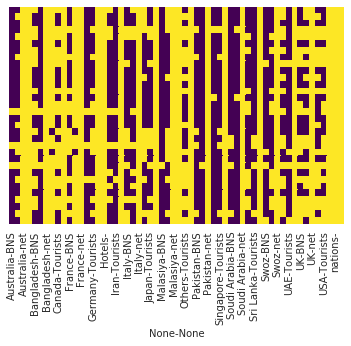

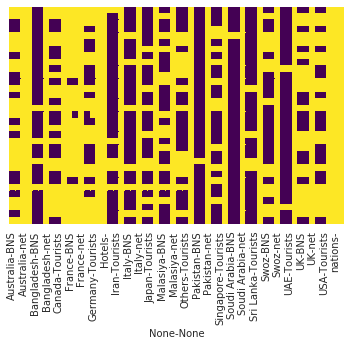

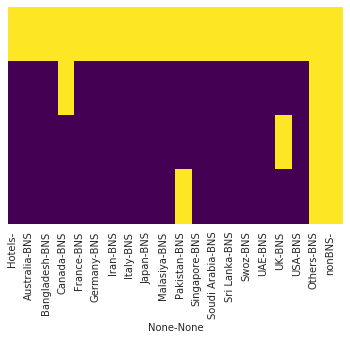

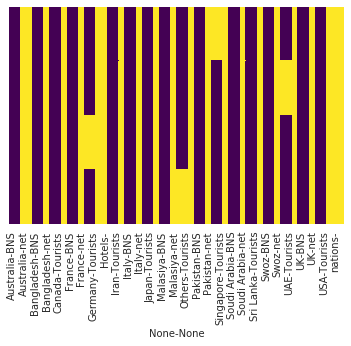

In [0]:
sns.heatmap(pondi_3.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()
sns.heatmap(pondi_2.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()
sns.heatmap(karak_3.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()
sns.heatmap(karak_2.notna(), yticklabels = False, cbar=False,cmap='viridis')
plt.show()

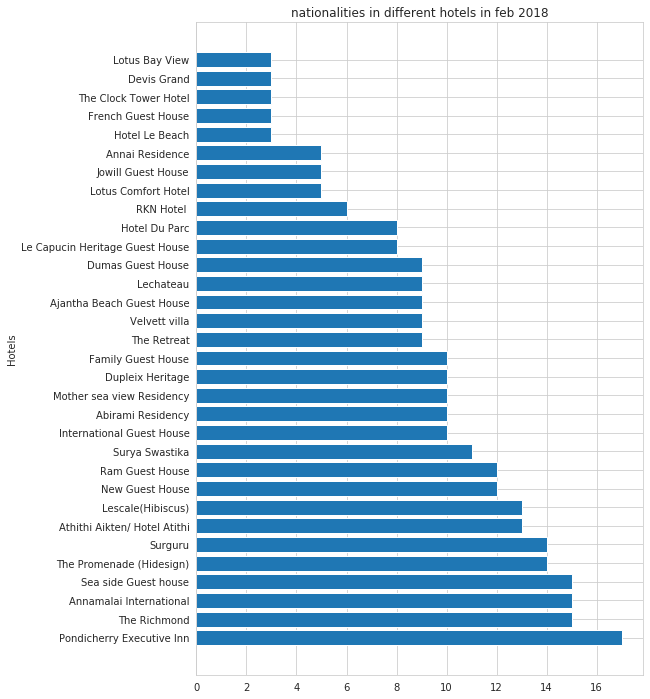

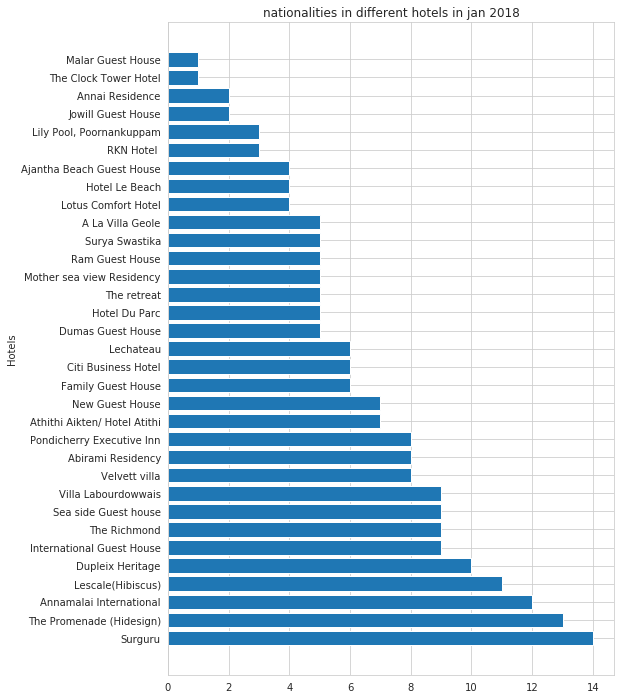

In [0]:
fig, ax = plt.subplots(figsize = (8, 12))
plt.barh('Hotels','nations',data = pondi_3.sort_values('nations',ascending = False))
ax.set_ylabel('Hotels')
ax.set_title('nationalities in different pondi hotels in feb 2018')
plt.show()
fig, ax = plt.subplots(figsize = (8, 12))
plt.barh('Hotels','nations',data = pondi_2.sort_values('nations',ascending = False))
ax.set_ylabel('Hotels')
ax.set_title('nationalities in different pondi hotels in jan 2018')
plt.show()

In [0]:
karak_3

Hotels Australia      Bangladesh       ...   Others       nations nonBNS   BNS
          Tourists  BNS   Tourists  BNS  ... Tourists   BNS                     
0    117       166    5          9  134  ...      930  3092      18   3921  6067
1    NaN       NaN  NaN        NaN  NaN  ...      NaN     2       3      2     4
2    NaN       NaN  NaN        NaN  NaN  ...      NaN    10       3     10    20
3    NaN       NaN  NaN        NaN  NaN  ...      NaN    12       3     12    24

[4 rows x 40 columns]

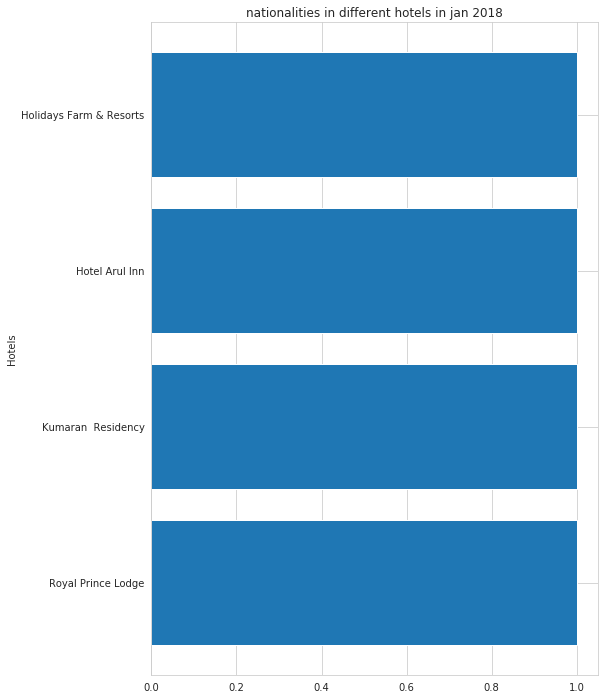

In [0]:
fig_1, ax_1 = plt.subplots(figsize = (8, 12))
plt.barh('Hotels','nations',data = karak_2)#.sort_values('nations',ascending = False))
ax_1.set_ylabel('Hotels')
ax_1.set_title('nationalities in different karaikal hotels in jan 2018')
plt.show()

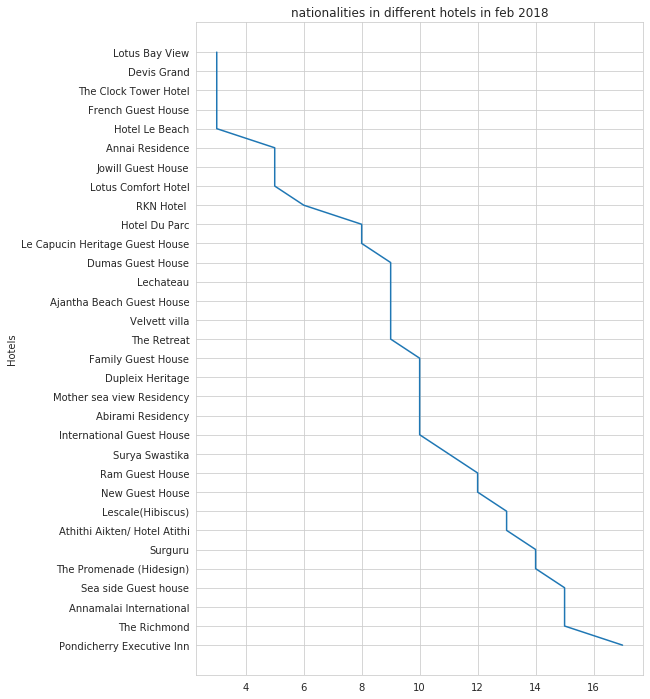

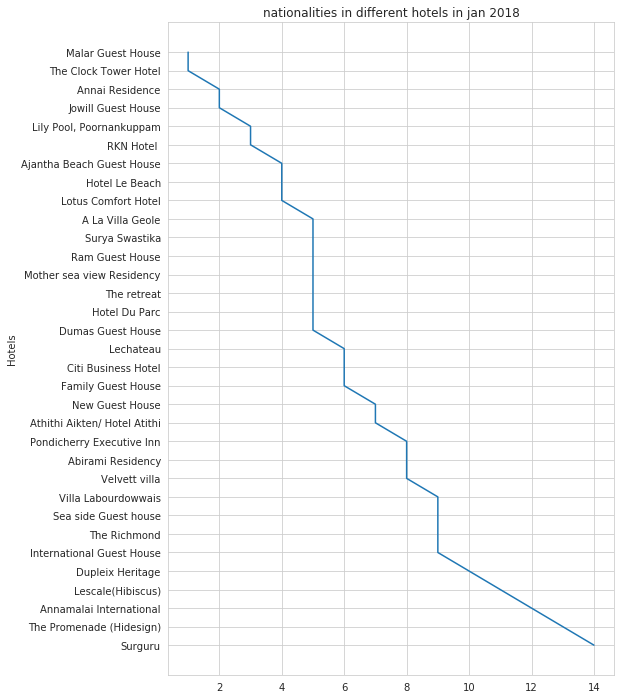

In [0]:
fig, ax = plt.subplots(figsize = (8, 12))
plt.plot('nations','Hotels', data = pondi_3.sort_values('nations',ascending = False))
ax.set_ylabel('Hotels')
ax.set_title('nationalities in different pondi hotels in feb 2018')
plt.show()
fig, ax = plt.subplots(figsize = (8, 12))
plt.plot('nations','Hotels',data = pondi_2.sort_values('nations',ascending = False))
ax.set_ylabel('Hotels')
ax.set_title('nationalities in different pondi hotels in jan 2018')
plt.show()

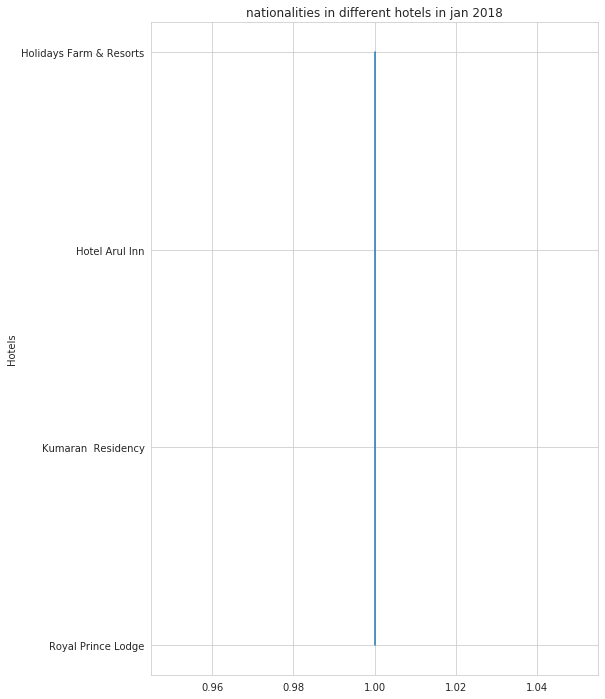

In [0]:
fig, ax = plt.subplots(figsize = (8, 12))
plt.plot('nations','Hotels',data = karak_2.sort_values('nations',ascending = False))
ax.set_ylabel('Hotels')
ax.set_title('nationalities in different karaikal hotels in jan 2018')
plt.show()

In [0]:
# built a net column for all countries

int_nat = {}
for i in range(len(nation)):
    int_nat[nation[0][i]] = []
    for j in range(len(pondi_3)):
        #print(pondi_3[nation[0][i]]['Tourists'][0])
        if not pd.isna(pondi_3[nation[0][i]]['Tourists'][j]):
            if not pd.isna(pondi_3[nation[0][i]]['BNS'][j]):
                int_nat[nation[0][i]].append(pondi_3[nation[0][i]]['Tourists'][j] + pondi_3[nation[0][i]]['BNS'][j])
            else:
                int_nat[nation[0][i]].append(pondi_3[nation[0][i]]['Tourists'][j]) 
        elif not pd.isna(pondi_3[nation[0][i]]['BNS'][j]):
            int_nat[nation[0][i]].append(pondi_3[nation[0][i]]['BNS'][j])
        else:
            int_nat[nation[0][i]].append(0)   
#int_nat

for i in range(len(nation)):
    pondi_3[nation[0][i], 'net'] = int_nat[nation[0][i]]
    pondi_3 = pondi_3.sort_index(axis=1)
#pondi_3

int_nat.clear()

for i in range(len(nation)):
    int_nat[nation[0][i]] = []
    for j in range(len(pondi_2)):
        #print(pondi_3[nation[0][i]]['Tourists'][0])
        if not pd.isna(pondi_2[nation[0][i]]['Tourists'][j]):
            if not pd.isna(pondi_2[nation[0][i]]['BNS'][j]):
                int_nat[nation[0][i]].append(pondi_2[nation[0][i]]['Tourists'][j] + pondi_2[nation[0][i]]['BNS'][j])
            else:
                int_nat[nation[0][i]].append(pondi_2[nation[0][i]]['Tourists'][j]) 
        elif not pd.isna(pondi_2[nation[0][i]]['BNS'][j]):
            int_nat[nation[0][i]].append(pondi_2[nation[0][i]]['BNS'][j])
        else:
            int_nat[nation[0][i]].append(0)
            
for i in range(len(nation)):
    pondi_2[nation[0][i], 'net'] = int_nat[nation[0][i]]
    pondi_2 = pondi_2.sort_index(axis=1)
    
int_nat.clear()
    
for i in range(len(nation)):
    int_nat[nation[0][i]] = []
    for j in range(len(karak_2)):
        #print(pondi_3[nation[0][i]]['Tourists'][0])
        if not pd.isna(karak_2[nation[0][i]]['Tourists'][j]):
            if not pd.isna(karak_2[nation[0][i]]['BNS'][j]):
                int_nat[nation[0][i]].append(karak_2[nation[0][i]]['Tourists'][j] + karak_2[nation[0][i]]['BNS'][j])
            else:
                int_nat[nation[0][i]].append(karak_2[nation[0][i]]['Tourists'][j]) 
        elif not pd.isna(karak_2[nation[0][i]]['BNS'][j]):
            int_nat[nation[0][i]].append(karak_2[nation[0][i]]['BNS'][j])
        else:
            int_nat[nation[0][i]].append(0)
            
for i in range(len(nation)):
    karak_2[nation[0][i], 'net'] = int_nat[nation[0][i]]
    karak_2 = karak_2.sort_index(axis=1)
    

In [0]:
pondi_3.head()

Australia                BNS Bangladesh  ...  USA               nations nonBNS
        BNS Tourists net              BNS  ...  BNS Tourists  net               
0       NaN      NaN   0    23          1  ...  NaN      NaN    0      10     46
1       NaN        4   4    82        NaN  ...    8      NaN    8       9     62
2       NaN      NaN   0     9        NaN  ...  NaN      NaN    0       5     12
3       NaN      NaN   0   254         10  ...  176        5  181      15    808
4       NaN       22  22  1087         40  ...  397       86  483      13   2152

[5 rows x 58 columns]

In [0]:
karak_2.head()

Australia              BNS Bangladesh  ...  USA              nations nonBNS
        BNS Tourists net            BNS  ...  BNS Tourists net               
0       NaN      NaN   0   8        NaN  ...  NaN      NaN   0       1      8
1       NaN      NaN   0   6        NaN  ...  NaN      NaN   0       1      6
2       NaN      NaN   0  10        NaN  ...  NaN      NaN   0       1     10
3       NaN      NaN   0  12        NaN  ...  NaN      NaN   0       1     12

[4 rows x 58 columns]

In [0]:
pondi_2.head()

Australia               BNS Bangladesh  ...  USA              nations nonBNS
        BNS Tourists net             BNS  ...  BNS Tourists net               
0         4        1   5   17        NaN  ...  NaN      NaN   0       5     34
1         5        5  10   48        NaN  ...   12       12  24       8     48
2       NaN      NaN   0   22        NaN  ...   12        4  16       4     78
3       NaN      NaN   0    4        NaN  ...  NaN      NaN   0       2      6
4         8       17  25  682        NaN  ...   13       26  39      12    383

[5 rows x 58 columns]

               0
0      Australia
1     Bangladesh
2         Canada
3         France
4        Germany
5           Iran
6          Italy
7          Japan
8       Malasiya
9       Pakistan
10     Singapore
11  Soudi Arabia
12     Sri Lanka
13          Swoz
14           UAE
15            UK
16           USA
17        Others
enter the index of country you wish to see stats of :3


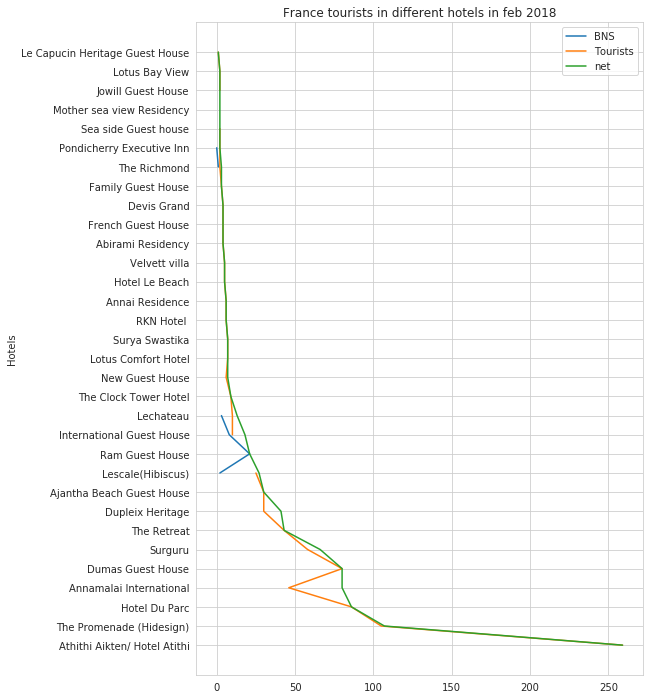

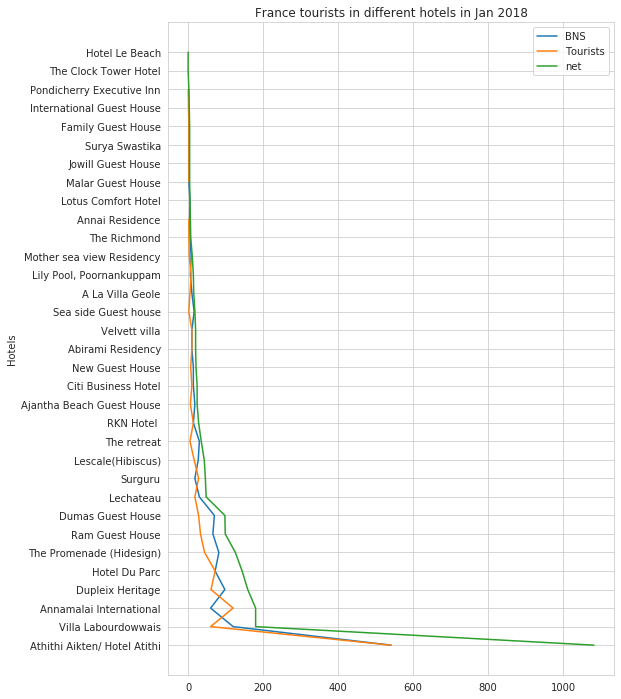

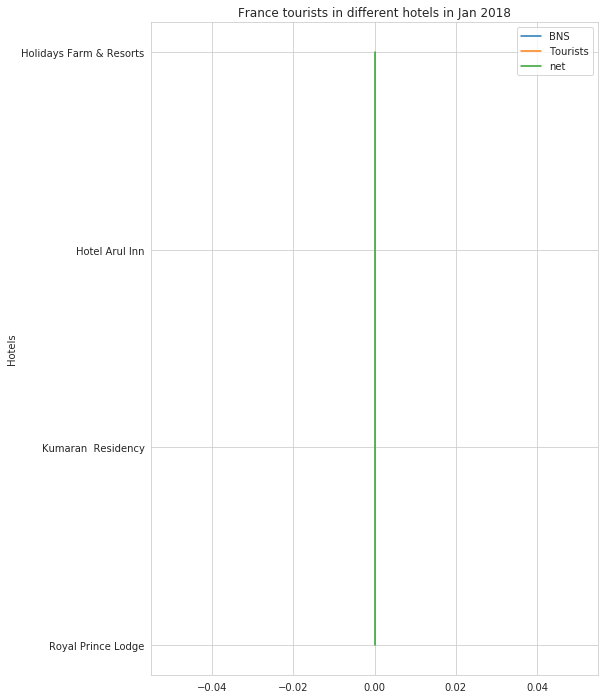

In [0]:
#configure_plotly_browser_state()
enable_plotly_in_cell()
def country_stat(a = pondi_3, b = pondi_2, c = karak_2, d = nation):
    print(d)
    k = int(input('enter the index of country you wish to see stats of :'))
    fig, ax = plt.subplots(figsize = (8, 12))
    plt.plot(d.iloc[k][0],'Hotels', data = pondi_3.sort_values((d.iloc[k][0], 'net'),ascending = False))
    ax.set_ylabel('Hotels')
    ax.set_title(d.iloc[k][0]+' tourists in different hotels in feb 2018')
    plt.legend(pondi_3[d.iloc[k][0]])
    plt.show()
    fig, ax = plt.subplots(figsize = (8, 12))
    plt.plot(d.iloc[k][0],'Hotels', data = pondi_2.sort_values((d.iloc[k][0], 'net'),ascending = False))
    ax.set_ylabel('Hotels')
    ax.set_title(d.iloc[k][0]+' tourists in different hotels in Jan 2018')
    plt.legend(pondi_2[d.iloc[k][0]])
    plt.show()
    fig, ax = plt.subplots(figsize = (8, 12))
    plt.plot(d.iloc[k][0],'Hotels', data = karak_2.sort_values((d.iloc[k][0], 'net'),ascending = False))
    ax.set_ylabel('Hotels')
    ax.set_title(d.iloc[k][0]+' tourists in different hotels in Jan 2018')
    plt.legend(karak_2[d.iloc[k][0]])
    plt.show()
    a[d.iloc[k][0]].iplot(kind = 'box', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Feb 2018') # success
    a[d.iloc[k][0]].iplot(kind = 'bar',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Feb 2018') # success
    a[d.iloc[k][0]].iplot(kind = 'spread',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Feb 2018') # success
    a[d.iloc[k][0]].iplot(kind = 'bubble', x = 'BNS', y = 'Tourists', size = 'net', xTitle  = 'BNS', yTitle = 'nonBNS', title = 'Tourist distribution in pondi, Feb 2018')
    b[d.iloc[k][0]].iplot(kind = 'box', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Jan 2018') # success
    b[d.iloc[k][0]].iplot(kind = 'bar',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distributions in pondi, Jan 2018') # success
    b[d.iloc[k][0]].iplot(kind = 'spread',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Jan 2018')
    b[d.iloc[k][0]].iplot(kind = 'bubble', x = 'BNS', y = 'Tourists', size = 'net', xTitle  = 'BNS', yTitle = 'nonBNS', title = 'Tourist distribution in pondi, Jan 2018')
    a.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'net'), title = d.iloc[k][0]+' tourist distribution in pondi, Feb 2018')
    a.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'BNS'), title = d.iloc[k][0]+' BNS tourist distribution in pondi, Feb 2018')
    a.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'Tourists'), title = d.iloc[k][0]+' nonBNS tourist distribution in pondi, Feb 2018')
    b.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'net'), title = d.iloc[k][0]+' tourist distribution in pondi, Jan 2018')
    b.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'BNS'), title = d.iloc[k][0]+' BNS tourist distribution in pondi, Jan 2018')
    b.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'Tourists'), title = d.iloc[k][0]+' non BNS tourist distribution in pondi, Jan 2018')
    c[d.iloc[k][0]].iplot(kind = 'box', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in pondi, Feb 2018') # success
    c[d.iloc[k][0]].iplot(kind = 'bar',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in karaikal, Jan 2018') # success
    c[d.iloc[k][0]].iplot(kind = 'spread',xTitle = 'Hotel index', yTitle = 'Frequency', title = d.iloc[k][0]+' tourist distribution in karaikal, Jan 2018') # success
    #c[d.iloc[k][0]].iplot(kind = 'bubble', x = 'BNS', y = 'Tourists', size = 'net', xTitle  = 'BNS', yTitle = 'nonBNS', title = 'Tourist distribution in karaikal, Jan 2018')
    c.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'net'), title = d.iloc[k][0]+' tourist distribution in karaikal, Jan 2018')
    c.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'BNS'), title = d.iloc[k][0]+' BNS tourist distribution in karaikal, Jan 2018')
    c.iplot(kind = 'pie', labels = 'Hotels', values = (d.iloc[k][0],'Tourists'), title = d.iloc[k][0]+' nonBNS tourist distribution in karaikal, Jan 2018')
#configure_plotly_browser_state()
country_stat()

In [0]:
nat_1 = []
enable_plotly_in_cell()
#configure_plotly_browser_state()
for i in range(len(nation)):
    nat_1.append(nation.iloc[i][0])
col = pd.MultiIndex.from_product([['Countries'],nat_1])
c = int(input('enter 1 for january,  2 for february, 3 for kalapet: '))
def hotel_stat():
    if  c == 1:
        print(pondi_3['Hotels'])
        i = int(input('enter the index of hotel you wish to see stats of : '))
        hot = pd.DataFrame(pondi_3.iloc[i].copy()); hot_1 = pd.DataFrame(); nam = pondi_3['Hotels'][i]
        for j in nat_1:
            hot_1[j] =  hot[i][j]
        hot_1.set_axis(labels = col, axis = 1, inplace = True)
        hot_1['Countries'].iplot(kind = 'bar', barmode = 'stack',title = nam+' Hotel Composition in Feb 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'box',title = nam+' Hotel Composition in Feb 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind  = 'surface',title = nam+' Hotel Composition in Feb 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'scatter',title = nam+' Hotel Composition in Feb 2018, pondi', xTitle = 'state', yTitle = 'scale') #works
        hot_1['Countries'].iloc[0].iplot(kind = 'bar', barmode = 'stack',title = nam+' BNS Tourists in Feb 2018, pondi', xTitle = 'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'bar', barmode = 'stack',title = nam+' non-BNS Tourists in Feb 2018, pondi', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[2].iplot(kind = 'bar', barmode = 'stack',title = nam+' Tourist total in Feb 2018, pondi', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[0].iplot(kind = 'scatter',title = nam+' BNS Tourists in Feb 2018, pondi', xTitle =  'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'scatter',title = nam+' non-BNS Tourists in Feb 2018, pondi', xTitle =  'Countries', yTitle = 'scale') 
        hot_1['Countries'].iloc[2].iplot(kind = 'scatter',title = nam+' Tourist total in Feb 2018, pondi', xTitle =  'Countries', yTitle = 'scale') 
    elif c == 2:
        print(pondi_2['Hotels'])
        i = int(input('enter the index of hotel you wish to see stats of : '))
        hot = pd.DataFrame(pondi_2.iloc[i].copy()); hot_1 = pd.DataFrame(); nam = pondi_2['Hotels'][i]
        for j in nat_1:
            hot_1[j] =  hot[i][j]
        hot_1.set_axis(labels = col, axis = 1, inplace = True)
        hot_1['Countries'].iplot(kind = 'bar', barmode = 'stack',title = nam+' Hotel Composition in Jan 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'box',title = nam+' Hotel Composition in Jan 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind  = 'surface',title = nam+' Hotel Composition in Jan 2018, pondi', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'scatter',title = nam+' Hotel Composition in Jan 2018, pondi', xTitle = 'state', yTitle = 'scale') #works
        hot_1['Countries'].iloc[0].iplot(kind = 'bar', barmode = 'stack',title = nam+' BNS Tourists in Jan 2018, pondi', xTitle = 'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'bar', barmode = 'stack',title = nam+' non-BNS Tourists in Jan 2018, pondi', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[2].iplot(kind = 'bar', barmode = 'stack',title = nam+' Tourist total in Jan 2018, pondi', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[0].iplot(kind = 'scatter',title = nam+' BNS Tourists in Jan 2018, pondi', xTitle =  'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'scatter',title = nam+' non-BNS Tourists in Jan 2018, pondi', xTitle =  'Countries', yTitle = 'scale') 
        hot_1['Countries'].iloc[2].iplot(kind = 'scatter',title = nam+' Tourist total in Jan 2018, pondi', xTitle =  'Countries', yTitle = 'scale') 
    else:
        print(karak_2['Hotels'])
        i = int(input('enter the index of hotel you wish to see stats of : '))
        hot = pd.DataFrame(karak_2.iloc[i].copy()); hot_1 = pd.DataFrame(); nam = karak_2['Hotels'][i]
        for j in nat_1:
            hot_1[j] =  hot[i][j]
        hot_1.set_axis(labels = col, axis = 1, inplace = True)
        hot_1['Countries'].iplot(kind = 'bar', barmode = 'stack',title = nam+' Hotel Composition in Jan 2018, karak', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'box',title = nam+' Hotel Composition in Jan 2018, karak', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind  = 'surface',title = nam+' Hotel Composition in Jan 2018, karak', xTitle = 'state', yTitle = 'scale')
        hot_1['Countries'].iplot(kind = 'scatter',title = nam+' Hotel Composition in Jan 2018, karak', xTitle = 'state', yTitle = 'scale') #works
        hot_1['Countries'].iloc[0].iplot(kind = 'bar', barmode = 'stack',title = nam+' BNS Tourists in Jan 2018, karak', xTitle = 'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'bar', barmode = 'stack',title = nam+' non-BNS Tourists in Jan 2018, karak', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[2].iplot(kind = 'bar', barmode = 'stack',title = nam+' Tourist total in Jan 2018, karak', xTitle = 'Countries', yTitle = 'scale')
        hot_1['Countries'].iloc[0].iplot(kind = 'scatter',title = nam+' BNS Tourists in Jan 2018, karak', xTitle =  'Countries', yTitle = 'scale') #woks for iloc[1] and iloc[2] too
        hot_1['Countries'].iloc[1].iplot(kind = 'scatter',title = nam+' non-BNS Tourists in Jan 2018, karak', xTitle =  'Countries', yTitle = 'scale') 
        hot_1['Countries'].iloc[2].iplot(kind = 'scatter',title = nam+' Tourist total in Jan 2018, karak', xTitle =  'Countries', yTitle = 'scale') 
#configure_plotly_browser_state()
hotel_stat()

enter 1 for january,  2 for february, 3 for kalapet: 2
0                 A La Villa Geole
1                Abirami Residency
2        Ajantha Beach Guest House
3                  Annai Residence
4          Annamalai International
5     Athithi Aikten/ Hotel Atithi
6              Citi Business Hotel
7                Dumas Guest House
8                 Dupleix Heritage
9               Family Guest House
10                   Hotel Du Parc
11                  Hotel Le Beach
12       International Guest House
13              Jowill Guest House
14                       Lechateau
15               Lescale(Hibiscus)
16             Lotus Comfort Hotel
17               Malar Guest House
18       Mother sea view Residency
19                 New Guest House
20       Pondicherry Executive Inn
21                 Ram Guest House
22                      RKN Hotel 
23            Sea side Guest house
24                         Surguru
25                  Surya Swastika
26           The Clock Tower Hotel
